# steps

- load the dataset
- exploratory data analysis
- prepare features and target
- train test split
- train the model
- evaluate the model
- visualise model
- model coefficients

In [19]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the dataset

from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
df = california.frame

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

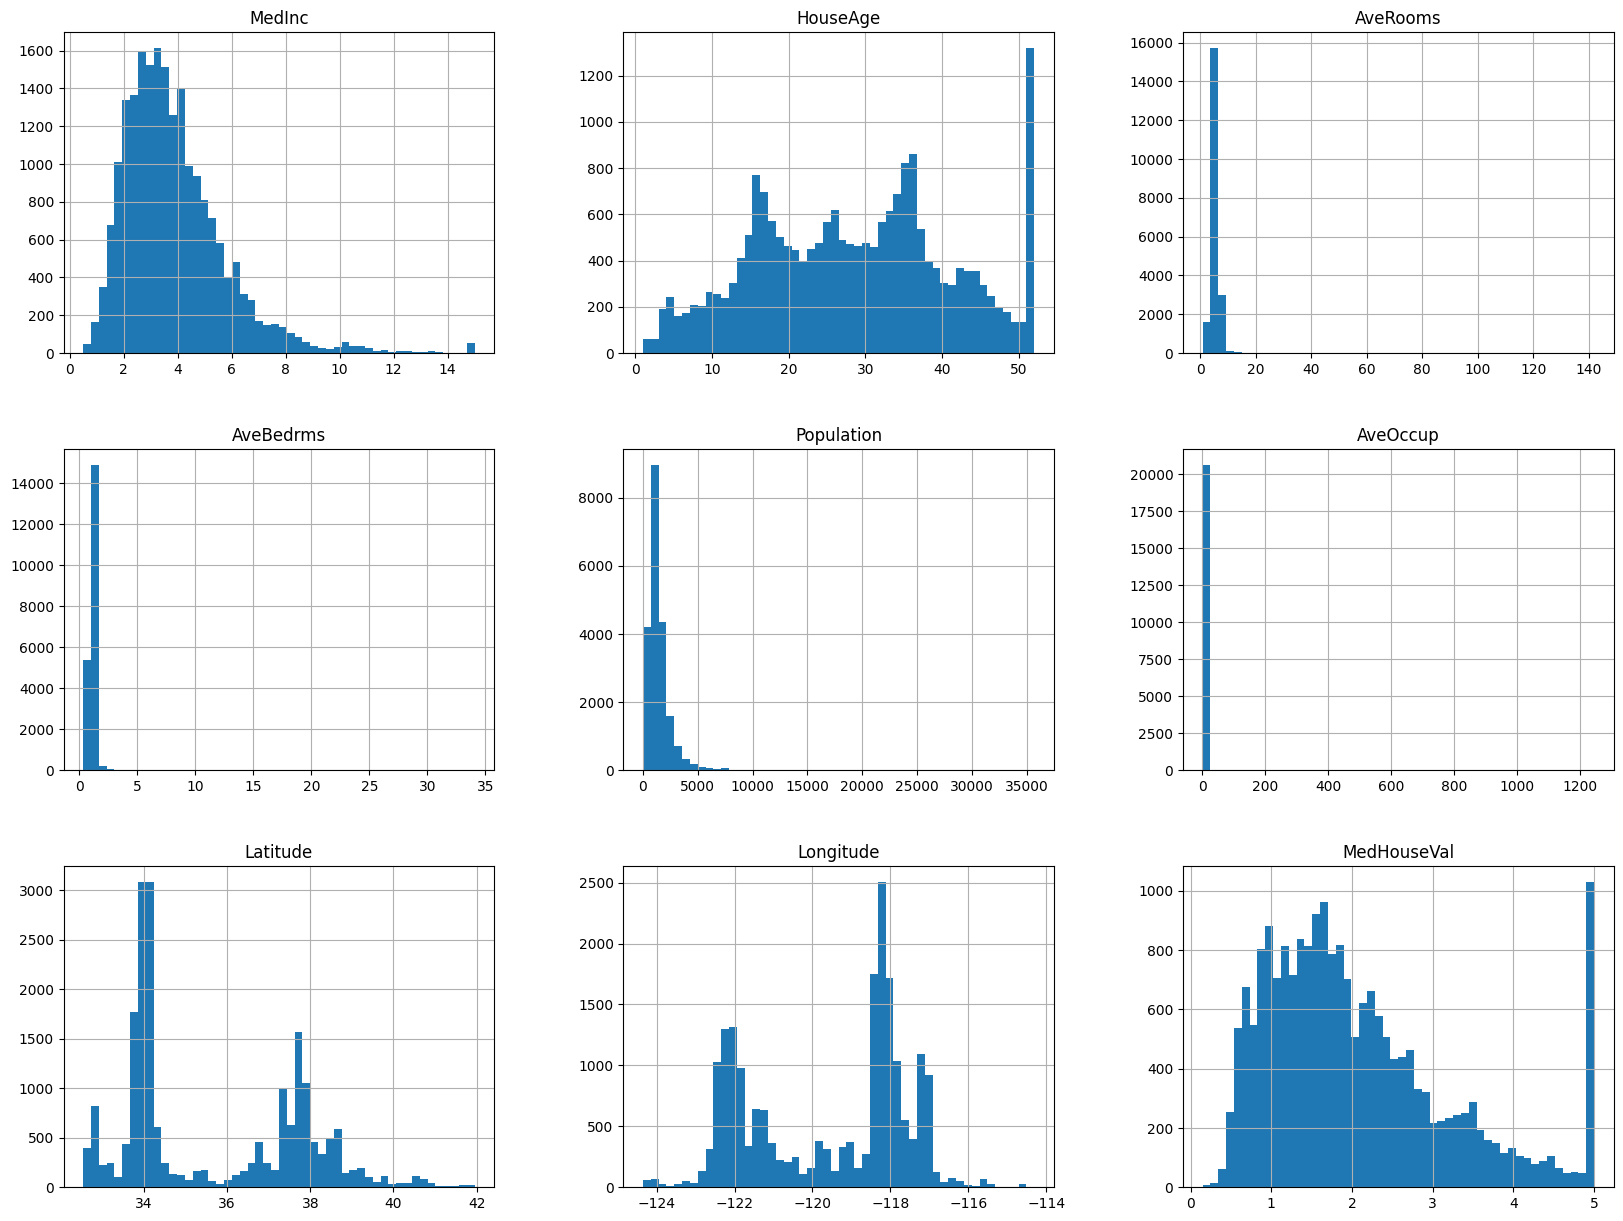

In [8]:
# eda

display(df.isnull().sum())

display(df.describe())

df.hist(bins=50, figsize=(20, 15))

In [9]:
# prepare features and target

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [10]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

display(f"training set shape: {X_train.shape}")
display(f"testing set shape: {X_test.shape}")

'training set shape: (16512, 8)'

'testing set shape: (4128, 8)'

In [16]:
# train the model

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [22]:
# evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

display(f"mean squared error: {mse:.4f}")
display(f"r2 score: {r2:.4f}")

'mean squared error: 0.5559'

'r2 score: 0.5758'

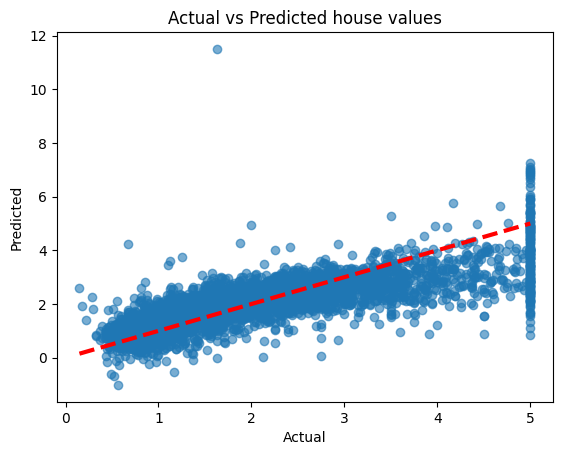

In [26]:
# visualize the model

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.title('Actual vs Predicted house values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [27]:
# model coefficients

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
display(coefficients)

,Coefficient
MedInc,0.448675
HouseAge,0.009724
AveRooms,-0.123323
AveBedrms,0.783145
Population,-0.000002
AveOccup,-0.003526
Latitude,-0.419792
Longitude,-0.433708
